In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [78]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [80]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [82]:
from sklearn.preprocessing import LabelEncoder

# 범주형 컬럼 자동 탐지
categorical_cols = df.select_dtypes(include=['object']).columns

# One-Hot Encoding 적용
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df_encoded

In [84]:
X = df.drop('Rings',axis=1)
X.head()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [86]:
y = df['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [88]:

Y = pd.get_dummies(y).values

In [90]:

X = X.values

In [92]:
X


array([[0, 0.455, 0.365, ..., 0.15, False, True],
       [1, 0.35, 0.265, ..., 0.07, False, True],
       [2, 0.53, 0.42, ..., 0.21, False, False],
       ...,
       [4174, 0.6, 0.475, ..., 0.308, False, True],
       [4175, 0.625, 0.485, ..., 0.296, False, False],
       [4176, 0.71, 0.555, ..., 0.495, False, True]], dtype=object)

In [94]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [96]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [98]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 


In [100]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 10), (836, 10), (3341, 28), (836, 28))

In [102]:

# 데이터 변환
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

print(X_test.shape)

(836, 10)


In [114]:

(836, 9)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Input
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(10,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',  # loss를 키워드 인자로 변경
              metrics=['mse'])

model.summary()




C:\Users\min22\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_split=0.1)
y_pred = model.predict(X_test)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 75732.6953 - mse: 75732.6953 - val_loss: 1.3659 - val_mse: 1.3659
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4311 - mse: 0.4311 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.042

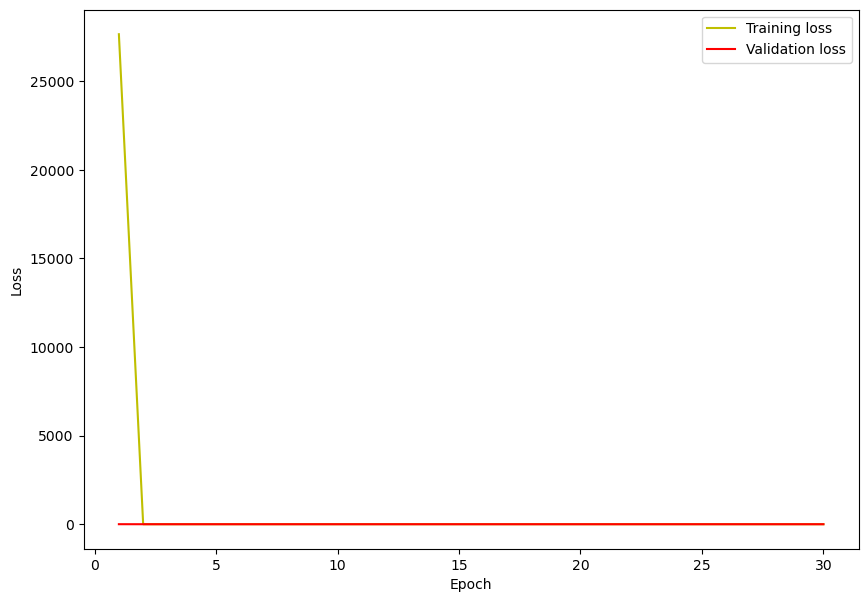

In [118]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [120]:

model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0424 - mse: 0.0424 


[0.042117517441511154, 0.042117517441511154]